# Loading data into R

- We will use the 'Iris' dataset. It contains 3 plant species, (setosa, virginica, versicolor) and four features measured for each sample (sepal length/width, petal length/width).

- Data is organized as a data frame: each row represents a case, and each col represents a variable.

In [1]:
# The datasets package needs to be loaded to access our data 
# For a full list of these datasets, type library(help = "datasets")
library(datasets)

# Load dataset
data(iris)

# This dispalys the first six rows
head(iris)
tail(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


# Structure of data

- Numerical variables vs Categorical variables

In [2]:
# View structure of data
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


# Descriptive statistics

- There are numerous functions for descriptive statistics from other packages (Hmisc, pastecs, psych...)

In [3]:
# Summary statistics for the dataset
summary(iris)

# Using the Hmisc package
#library(psych)
#describe(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

# Feature Selection
- We don't necessarily need all the variables.
- Use 'select' to select only the variables that you find relevant.

In [4]:
library(dplyr)

# From now on, work with only sepal length and width.
iris <- select(iris, Sepal.Length, Sepal.Width, Species)

head(iris)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



,Sepal.Length,Sepal.Width,Species
,<dbl>,<dbl>,<fct>
1,5.1,3.5,setosa
2,4.9,3.0,setosa
3,4.7,3.2,setosa
4,4.6,3.1,setosa
5,5.0,3.6,setosa
6,5.4,3.9,setosa


# Frequencies
- Use 'table' to explore variables
- Use 'filter' to subset

In [5]:
table(iris$Species)

# filter the data for species virginica
virginica <- filter(iris, Species == "virginica")
head(virginica)

table(virginica$Species)


    setosa versicolor  virginica 
        50         50         50 

,Sepal.Length,Sepal.Width,Species
,<dbl>,<dbl>,<fct>
1,6.3,3.3,virginica
2,5.8,2.7,virginica
3,7.1,3.0,virginica
4,6.3,2.9,virginica
5,6.5,3.0,virginica
6,7.6,3.0,virginica



    setosa versicolor  virginica 
         0          0         50 

# Visualizing data

- Visualization is important for exploratory analysis
- plot: basic plots
- ggplot2: modern looking, hassle-free plots
- ggplot2: iterative construction: add layers of data, annotations, summaries...

# Univariate Plots

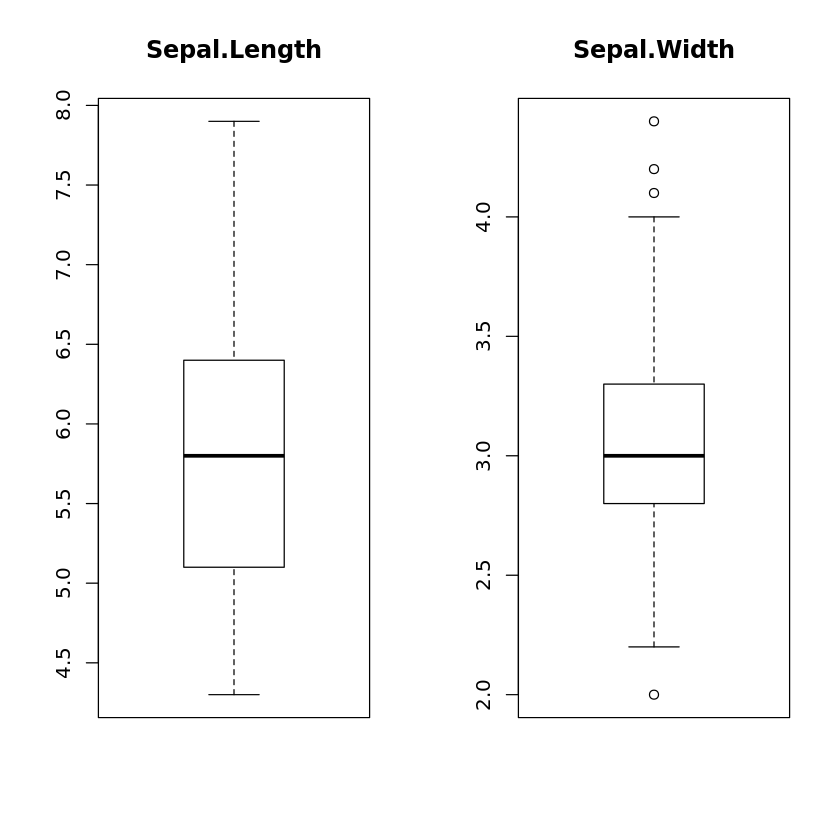

In [6]:
# boxplot for each attribute on one image
par(mfrow=c(1,2))
boxplot(iris$Sepal.Length, main="Sepal.Length")
boxplot(iris$Sepal.Width, main="Sepal.Width")

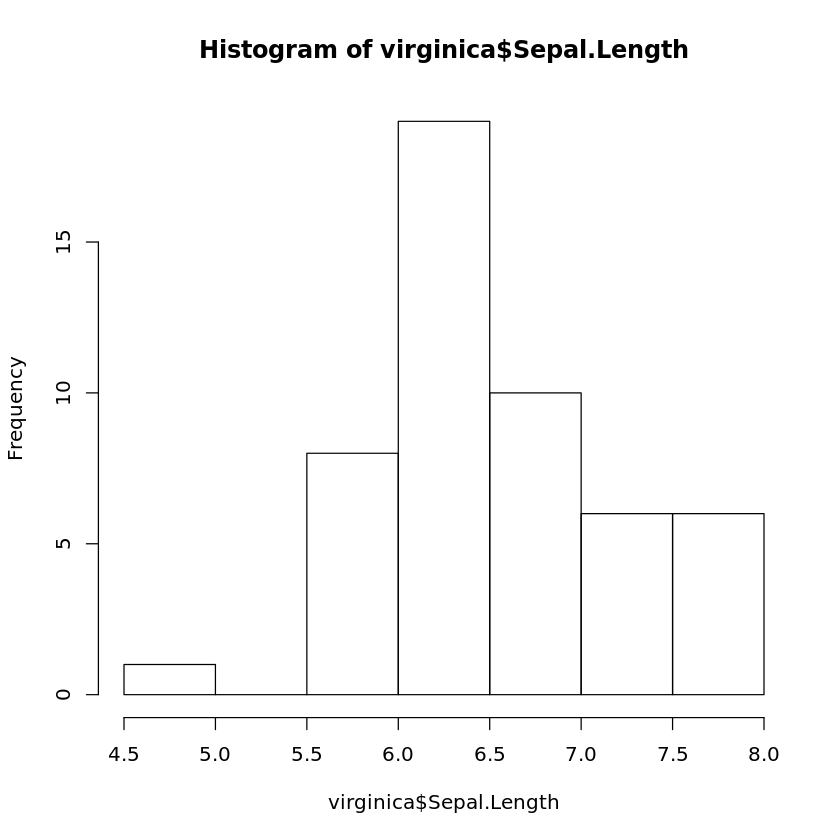

In [7]:
# histogram of sepal length for virginica
# ?hist will give you details on more arguments
hist(virginica$Sepal.Length)

# Multivariate Plots

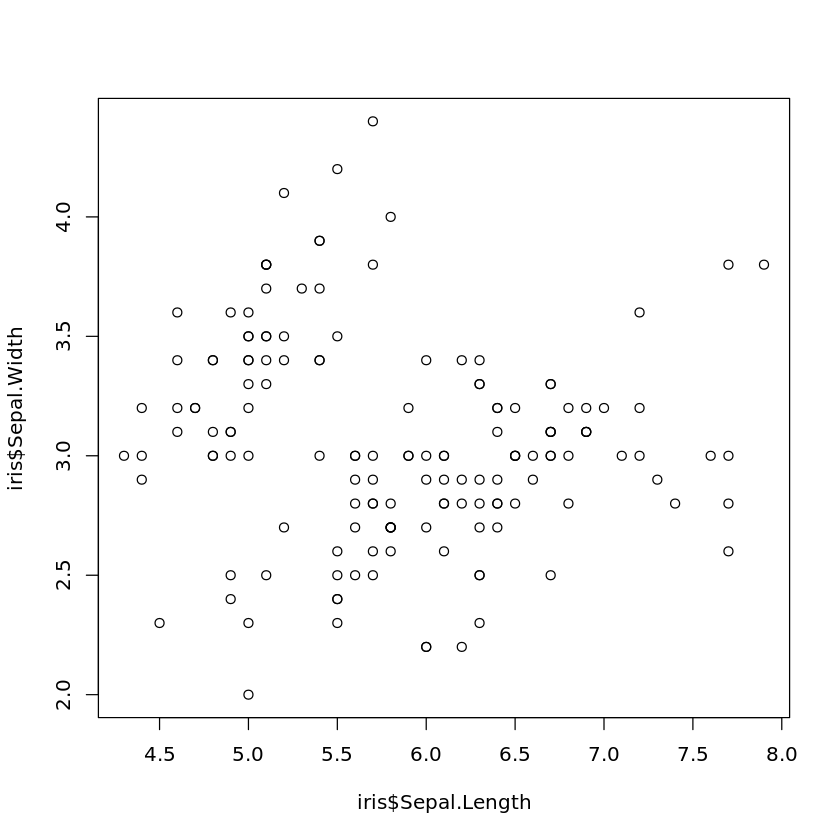

In [8]:
# Basic scatterplot
plot(iris$Sepal.Length, iris$Sepal.Width)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


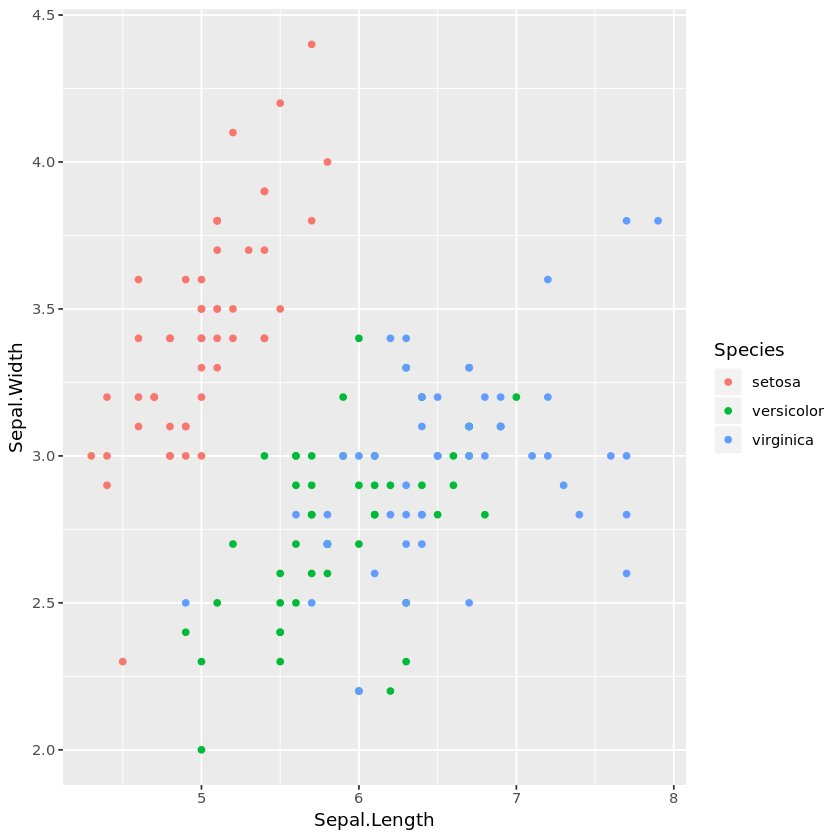

In [9]:
library(ggplot2)

# Scatterplot of sepal width vs. length, controlling for species
ggplot(data = iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + 
    geom_point()

# Correlations

- Correlation(X,Y) measures the degree of linear dependence between X and Y.

In [10]:
# Drop the Species column
virginica.vars <- select(virginica, Sepal.Length, Sepal.Width)

# Correlation between all pairs of variables
cor(virginica.vars)

,Sepal.Length,Sepal.Width
Sepal.Length,1.0000000,0.4572278
Sepal.Width,0.4572278,1.0000000


# Linear Regression
- Linear regression is used to predict the value of an outcome variable Y 
  based on one or more input predictor variables X.
- The aim is to establish a linear relationship between X and Y:

  Y = b + aX + error
- Use this formula to estimate the value of the response Y when only X is known.

In [11]:
# Build linear regression model on full data.
# We want to express sepal width as a function of length.
linearMod <- lm(Sepal.Width ~ Sepal.Length, data=virginica.vars)

print(linearMod)


Call:
lm(formula = Sepal.Width ~ Sepal.Length, data = virginica.vars)

Coefficients:
 (Intercept)  Sepal.Length  
      1.4463        0.2319  



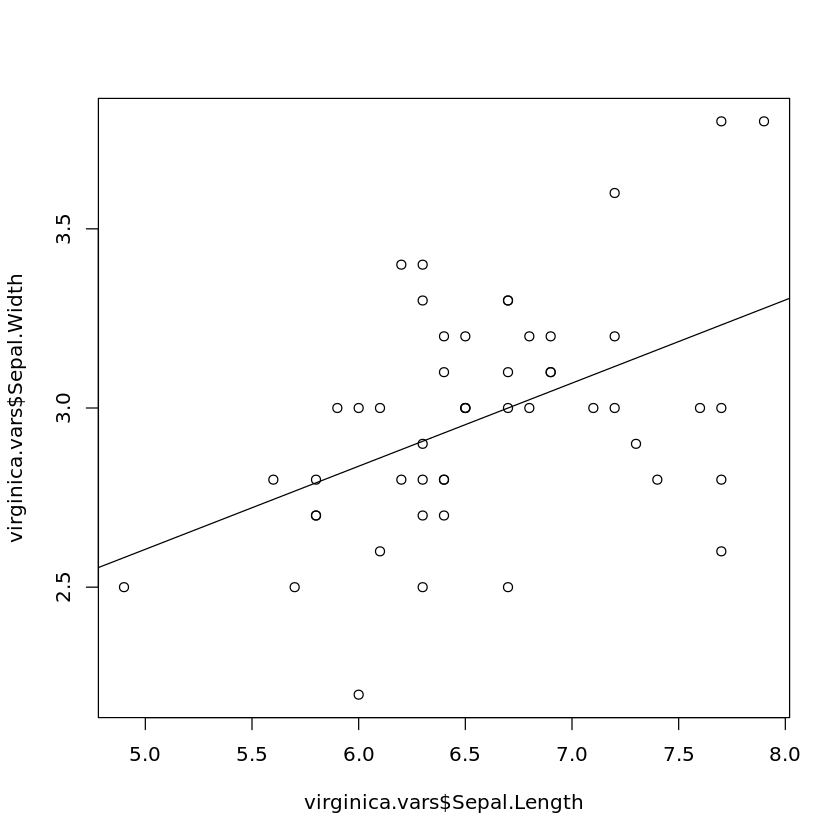

In [12]:
plot(virginica.vars$Sepal.Length, virginica.vars$Sepal.Width)

# Add regression line to the plot
abline(linearMod)

# Linear Regression Diagnostics
- Before using a regression model, you have to ensure that it is statistically significant.
- A small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance.
- A model is statistically significant only when these p-Values are less than the pre-determined statistical significance level.

In [13]:
# Model summary
summary(linearMod)


Call:
lm(formula = Sepal.Width ~ Sepal.Length, data = virginica.vars)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63765 -0.18801  0.00438  0.16778  0.56814 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.4463     0.4309   3.357 0.001549 ** 
Sepal.Length   0.2319     0.0651   3.562 0.000843 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2898 on 48 degrees of freedom
Multiple R-squared:  0.2091,	Adjusted R-squared:  0.1926 
F-statistic: 12.69 on 1 and 48 DF,  p-value: 0.0008435
